EJERCICIOS VISUALIZACION II:

A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

En estos ejercicios debes decidir que gráfica es más adecuada. Puedes utilizar cualquier gráfica vista hasta el momento: gráficas para variables numéricas, categóricas o relación entre ambas.

¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

¿Cuáles son los 10 países con la mayor área forestal?

¿Cómo se distribuye la densidad de población entre los países?

¿Existe una relación entre el PIB y la tasa de desempleo de los países?

¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("Datos/world_data_full_apply_nulos.csv") 

In [3]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            195 non-null    int64  
 1   country                               195 non-null    object 
 2   density                               195 non-null    float64
 3   abbreviation                          188 non-null    object 
 4   agricultural_land                     188 non-null    float64
 5   land_area                             165 non-null    float64
 6   armed_forces_size                     166 non-null    float64
 7   birth_rate                            189 non-null    float64
 8   calling_code                          194 non-null    float64
 9   capital/major_city                    192 non-null    object 
 10  co2-emissions                         183 non-null    float64
 11  cpi                

(   Unnamed: 0      country  density abbreviation  agricultural_land  \
 0           0  Afghanistan     60.0           AF               58.1   
 1           1      Albania    105.0           AL               43.1   
 2           2      Algeria     18.0           DZ               17.4   
 3           3      Andorra    164.0           AD               40.0   
 4           4       Angola     26.0           AO               47.5   
 
    land_area  armed_forces_size  birth_rate  calling_code capital/major_city  \
 0    652.230              323.0       32.49          93.0              Kabul   
 1     28.748                9.0       11.78         355.0             Tirana   
 2        NaN              317.0       24.28         213.0            Algiers   
 3    468.000                NaN        7.20         376.0   Andorra la Vella   
 4        NaN              117.0       40.73         244.0             Luanda   
 
    co2-emissions     cpi  cpi_change currency-code  fertility_rate  \
 0     

In [4]:
# ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

contador_paises = df["continent"].value_counts()

continente_más_países =contador_paises.idxmax

mayor_porcentaje = (contador_paises.max() / contador_paises.sum()) *100

In [5]:
contador_paises

continent
Africa             53
Europe             47
Asia               45
Central America    20
Oceania            14
South America      13
North America       2
Name: count, dtype: int64

In [6]:
continente_más_países

<bound method Series.idxmax of continent
Africa             53
Europe             47
Asia               45
Central America    20
Oceania            14
South America      13
North America       2
Name: count, dtype: int64>

In [7]:
mayor_porcentaje

27.31958762886598

El continente con la mayor cantidad de países en el conjunto de datos es África y el porcentaje de países en ese continente es de 27.32%

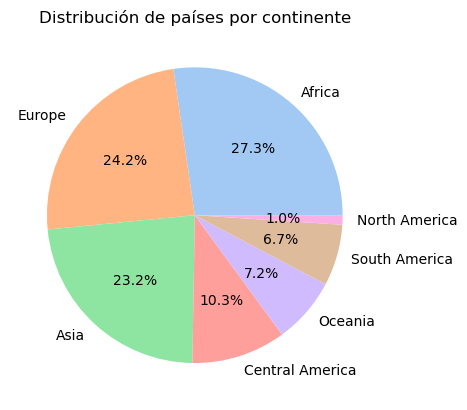

In [8]:
# GRAFICA:

plt.pie(contador_paises, labels=contador_paises.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribución de países por continente");

In [9]:
# ¿Cuáles son los 10 países con la mayor área forestal?

mayor_area_forestal = df[["country", "forested_area"]].sort_values(by="forested_area", ascending=False)

In [10]:
top_10_forest=mayor_area_forestal.head(10)

In [11]:
top_10_forest

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


C:\Users\bmija\AppData\Local\Temp\ipykernel_22552\783517954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_forest, x="forested_area", y="country", palette='viridis')


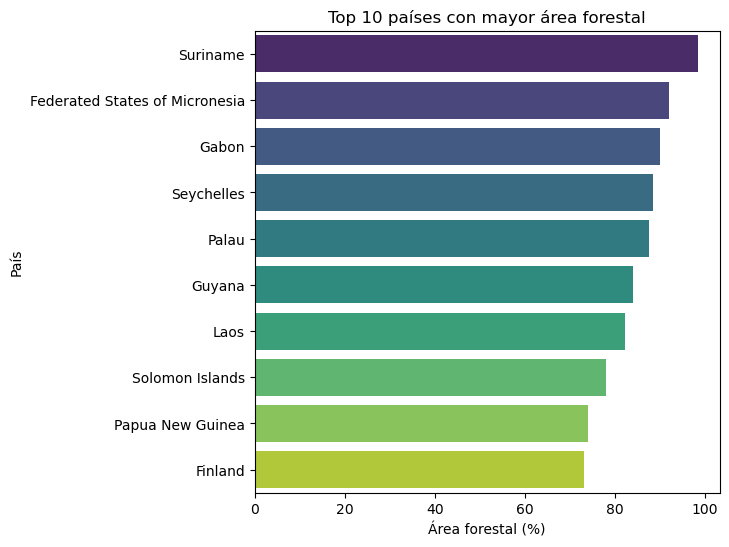

In [12]:
# GRAFICA:
plt.figure(figsize=(6,6))
sns.barplot(top_10_forest, x="forested_area", y="country", palette='viridis')
plt.xlabel("Área forestal (%)")
plt.ylabel("País")
plt.title("Top 10 países con mayor área forestal");

La mayor area forestal se encuentra en Suriname

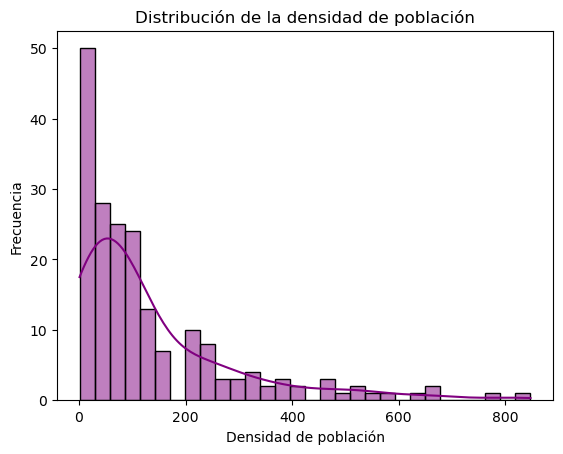

In [13]:
# ¿Cómo se distribuye la densidad de población entre los países?

sns.histplot(df["density"], bins=30, kde=True, color='purple')
plt.xlabel("Densidad de población")
plt.ylabel("Frecuencia")
plt.title("Distribución de la densidad de población");

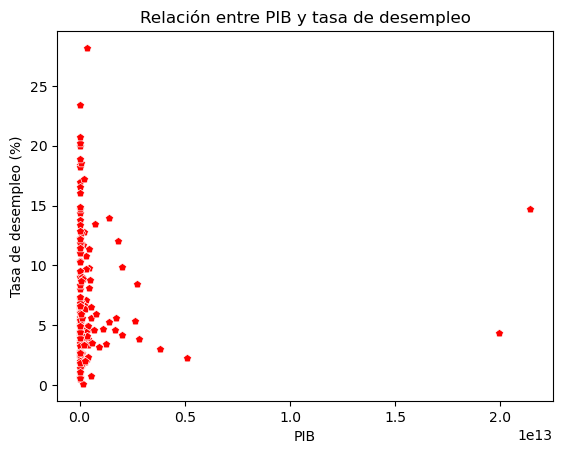

In [19]:
# ¿Existe una relación entre el PIB y la tasa de desempleo de los países?:

sns.scatterplot(data=df, x="gdp", y="unemployment_rate", color="red", marker= "p")
plt.xlabel("PIB")
plt.ylabel("Tasa de desempleo (%)")
plt.title("Relación entre PIB y tasa de desempleo");

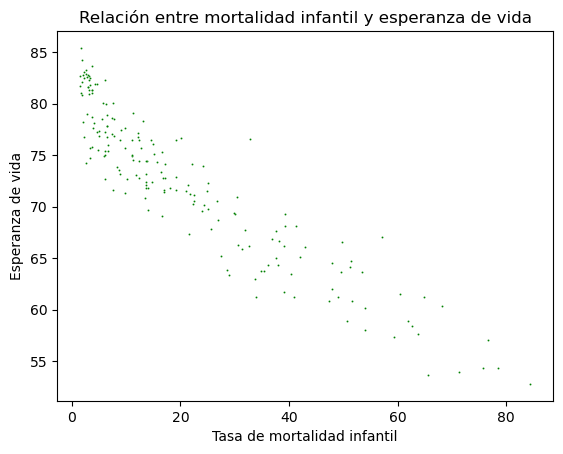

In [ ]:
# ¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

sns.scatterplot(data=df, x="infant_mortality", y="life_expectancy", color="green", s=2)
plt.xlabel("Tasa de mortalidad infantil")
plt.ylabel("Esperanza de vida")
plt.title("Relación entre mortalidad infantil y esperanza de vida");

In [17]:
df.head()

,Unnamed: 0,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [ ]:
sns.boxplot(x="infant_mortality", y="life_expectancy", data=df, color="green", s=2)